# EDA

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df1 = pd.read_csv("diabetes.csv")
df = df1.copy()

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [8]:
df['Glucose'].mean()

120.89453125

In [9]:
df['BloodPressure'].mean()

69.10546875

### Let's explore our variables in the data set with the grab_col_names function.

In [10]:
#It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    #cat_cols: This list contains column names for columns with data type "object" (i.e., categorical columns).
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    #num_but_cat: This list contains column names for columns with data types other than "object" but having a number of unique values less than cat_th (default value is 10).
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    #cat_but_car: This list contains column names for columns with data type "object" (i.e., categorical columns) but having a number of unique values greater than car_th (default value is 20).
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


In [11]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [12]:
cat_cols

['Outcome']

In [13]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## Missing Values:

In [14]:
df_copy = df

In [15]:
def check_missing_value(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    
    if na_name:
        return na_columns

In [16]:
check_missing_value(df_copy)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [17]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
check_missing_value(df_copy)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [19]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### There is no missing values in the dataset. Instead some columns minimum values are "0" which is not possible for some reasons (except Pregnancies):
#### Glucose, BloodPressure, SkinThickness, Insulin, BMI

## Correlation:

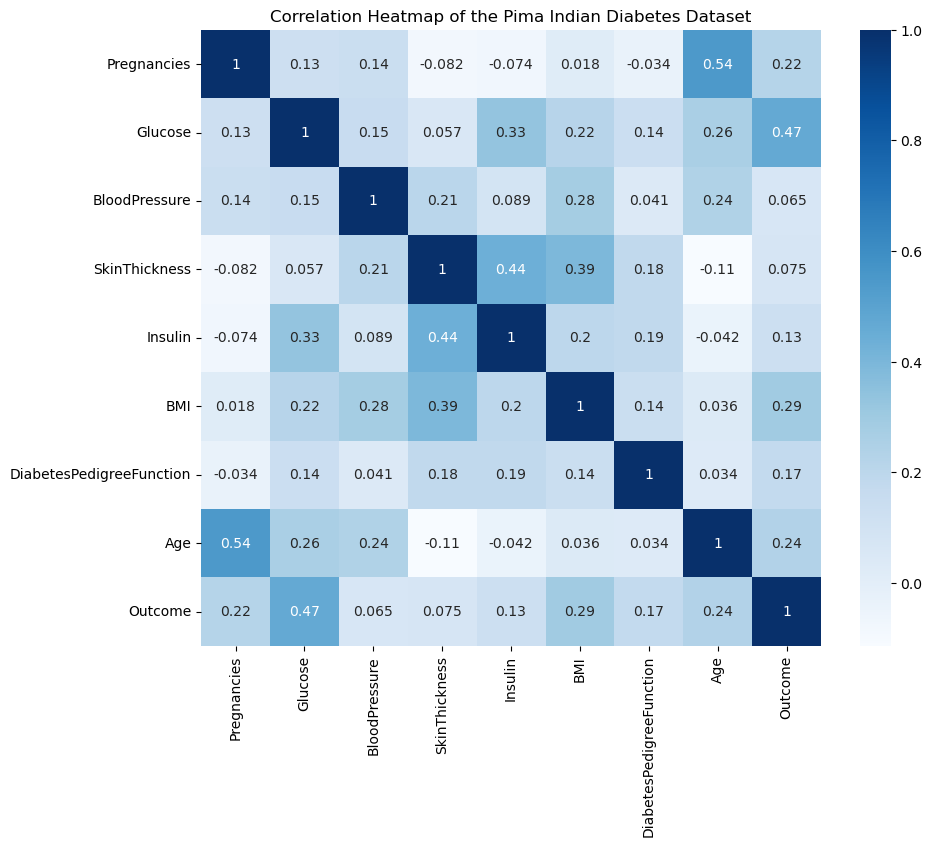

In [20]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="Blues", annot=True)
plt.title('Correlation Heatmap of the Pima Indian Diabetes Dataset')
plt.show()

In [21]:
d = {}
#finding unique counts
for col in df.columns:
    d[col] = df[col].value_counts().shape[0]
    
pd.DataFrame(d,index = ['Unique Counts']).transpose()

,Unique Counts
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Feature Extraction

In [23]:
df.loc[(df["Pregnancies"] == 0), 'Preg_CAT'] = 'Never'
df.loc[(df["Pregnancies"] == 1), 'Preg_CAT'] = 'One_Time'
df.loc[(df["Pregnancies"] > 1), 'Preg_CAT'] = 'Many_Times'

df.loc[(df["Glucose"] < 70), 'GLUCOSE_CAT'] = "Hipoglisemi"
df.loc[(df["Glucose"] >= 70) & (df['Glucose'] < 100), 'GLUCOSE_CAT'] = "Normal"
df.loc[(df["Glucose"] >= 100) & (df['Glucose'] < 125), 'GLUCOSE_CAT'] = "Impaired_Glucose"
df.loc[(df["Glucose"] >= 125), 'GLUCOSE_CAT'] = "Hiperglisemi"

df["BMI_CAT"] = pd.cut(df["BMI"], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 49.9],
                       labels=["underweight", "normal", "overweight", "obese", "obese_class2", "obese_class3"])

# Create dummy variables for categorical columns
df = pd.get_dummies(df, columns=["Preg_CAT", "GLUCOSE_CAT", "BMI_CAT"])

# Drop irrelevant columns for modeling
df.drop(["Age", "SkinThickness", "Pregnancies", "Glucose", "BMI", "Insulin"], axis=1, inplace=True)


In [24]:
df.shape

(768, 16)

In [25]:
df.isna().sum()

BloodPressure                   0
DiabetesPedigreeFunction        0
Outcome                         0
Preg_CAT_Many_Times             0
Preg_CAT_Never                  0
Preg_CAT_One_Time               0
GLUCOSE_CAT_Hiperglisemi        0
GLUCOSE_CAT_Hipoglisemi         0
GLUCOSE_CAT_Impaired_Glucose    0
GLUCOSE_CAT_Normal              0
BMI_CAT_underweight             0
BMI_CAT_normal                  0
BMI_CAT_overweight              0
BMI_CAT_obese                   0
BMI_CAT_obese_class2            0
BMI_CAT_obese_class3            0
dtype: int64

# Data Visualization

<Figure size 1000x600 with 0 Axes>

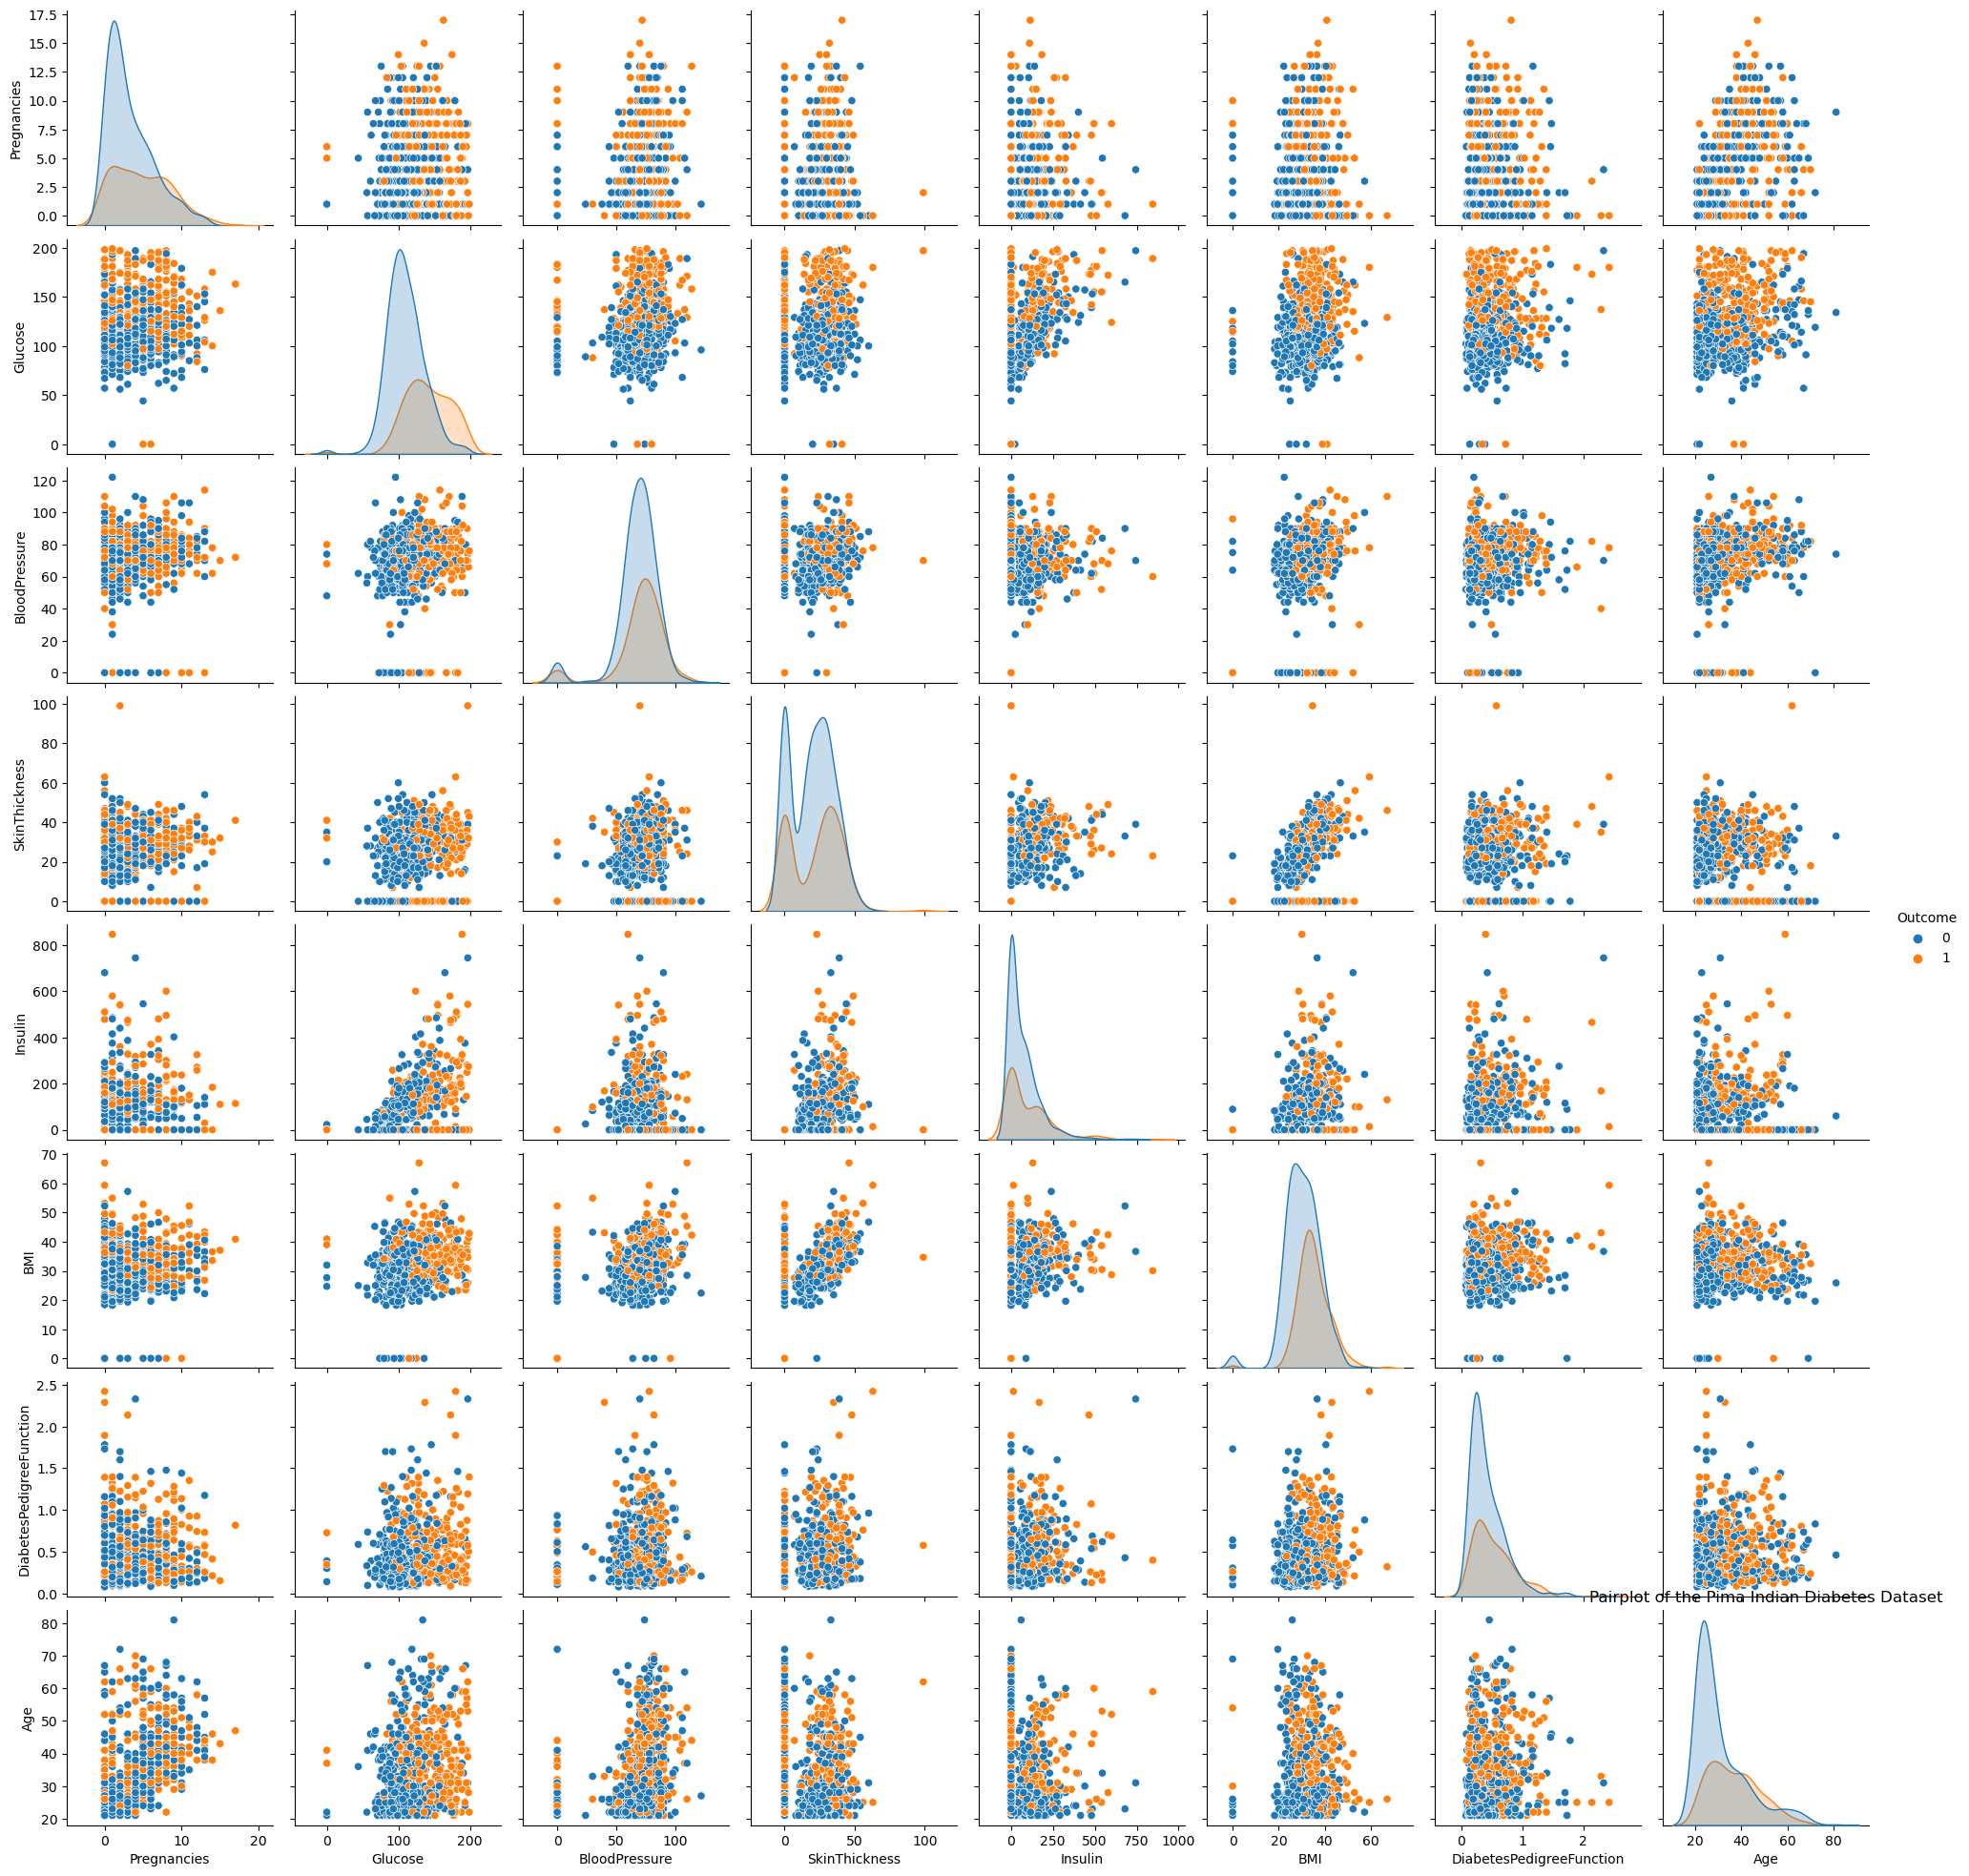

In [26]:
plt.figure(figsize=(10, 6))
sns.pairplot(df1, hue='Outcome')
plt.title('Pairplot of the Pima Indian Diabetes Dataset')
plt.show()


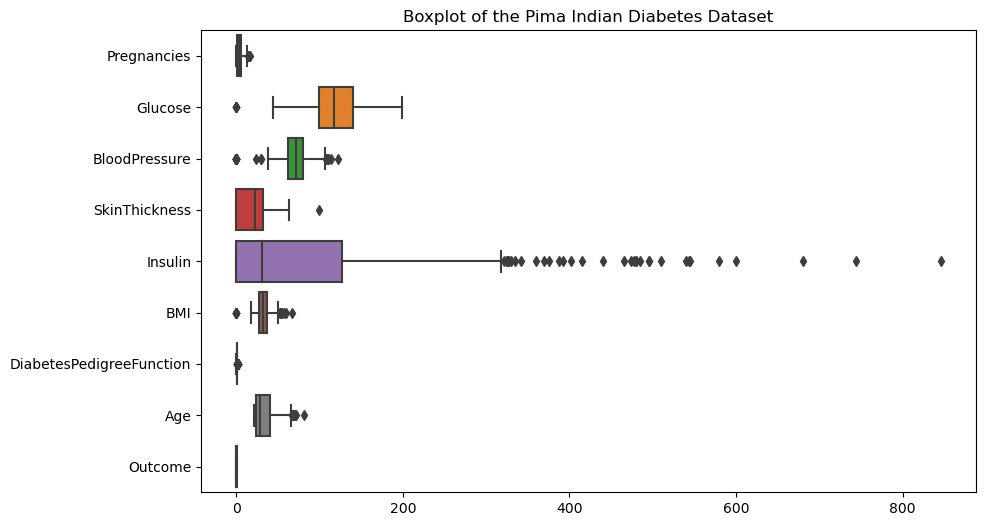

In [27]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, orient='h')
plt.title('Boxplot of the Pima Indian Diabetes Dataset')
plt.show()

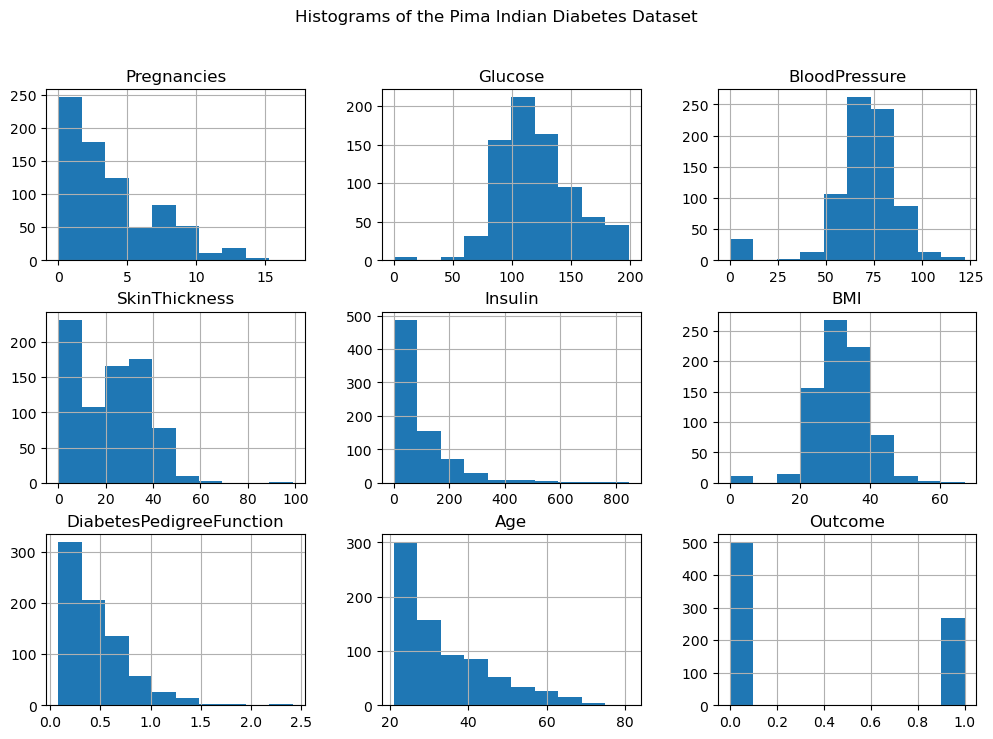

In [28]:
# Histogram of each feature
df1.hist(figsize=(12, 8))
plt.suptitle('Histograms of the Pima Indian Diabetes Dataset')
plt.show()

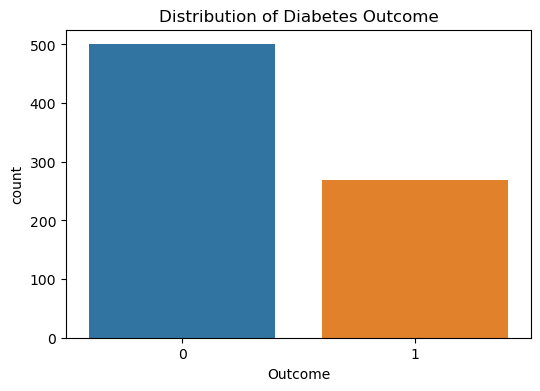

In [29]:
# Countplot for Outcome (diabetes) distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Diabetes Outcome')
plt.show()

### We have seen that the behaviors of those with diabetes are around 35%, while those without diabetes are around 65%.

# Modeling


### We divide our dataset into two as test and train.

In [30]:
Y = df['Outcome']
X = df.drop('Outcome', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### We will make 3 different models and evaluate the model success. 
##### 1. Logistic Regression
##### 2. SVM
##### 3. RandomForestClassifier
##### 4. DecisionTreeClassifier

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [35]:
model.score(X_test_scaled, Y_test)

0.7142857142857143

### LogisticRegression accuracy: 75%

In [36]:
from sklearn import svm

svc = svm.SVC(kernel = 'poly')
svc.fit(X_train_scaled, Y_train)
print(svc.score(X_test_scaled, Y_test))

0.6948051948051948


### SVM accuracy: 68%

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=6)

In [38]:
rf.fit(X_train_scaled, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=6)

In [39]:
rf.score(X_test_scaled, Y_test)

0.6948051948051948

### RandomForestClassifier accuracy: 71%

In [40]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [41]:
tree.score(X_test_scaled,Y_test)

0.6948051948051948

### DecisionTreeClassifier accuracy: 77%

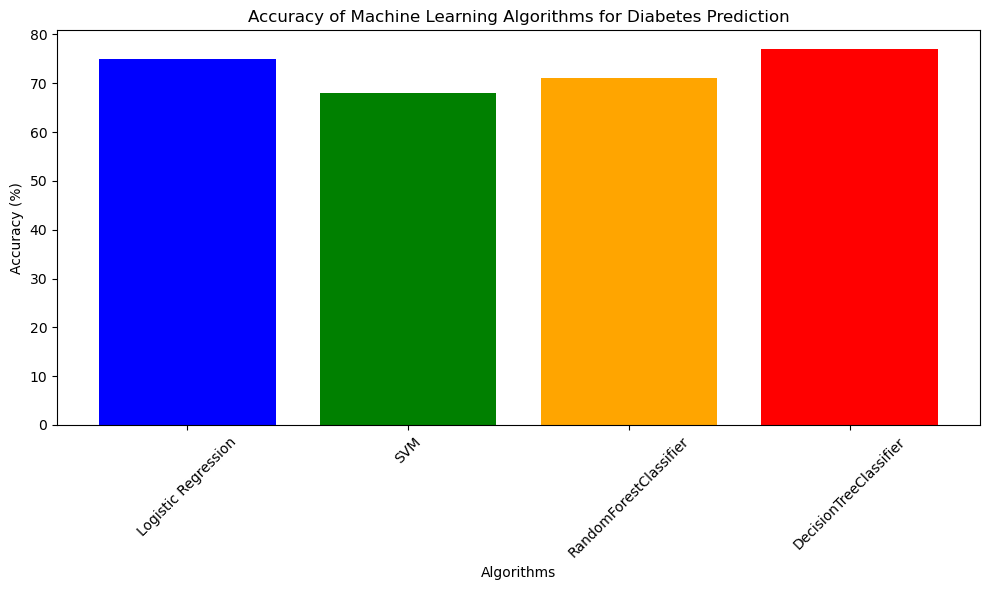

In [42]:
results = {
    'Logistic Regression': 75,
    'SVM': 68,
    'RandomForestClassifier': 71,
    'DecisionTreeClassifier': 77
}
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Create the bar plot
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red'])

# Add labels and a title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Machine Learning Algorithms for Diabetes Prediction')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()